# 题目一
训练线性回归模型 $y=2x+5$

In [1]:
import torch
from matplotlib import pyplot as plt

In [28]:
x = torch.linspace(1,20,20,dtype=torch.float)
target = torch.mul(x,3)+(5+torch.randn((20)))

In [29]:
w = torch.randn((1),requires_grad=True)

In [30]:
b = torch.zeros((1,),requires_grad=True)

In [31]:
lr = 0.005

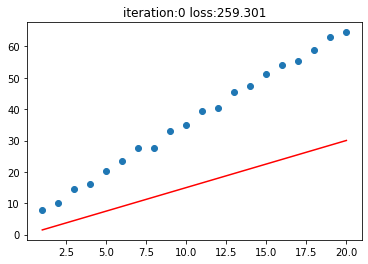

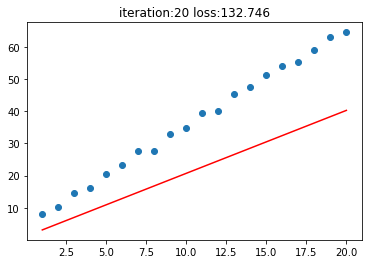

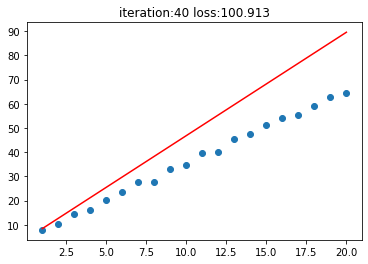

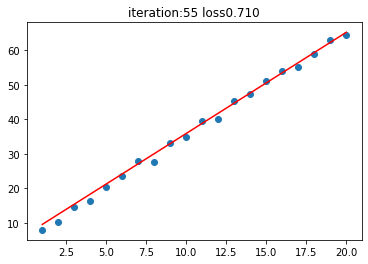

In [32]:
for iteration in range(1000):
    y = torch.add(torch.mul(w,x),b)
    loss = (0.5*(y-target)**2).mean()
    loss.backward()
    w.data.sub_(lr*w.grad)
    b.data.sub_(lr*b.grad)
    
    if iteration % 20 ==0 :
        fig,axes = plt.subplots()
        axes.scatter(x.data.numpy(),target.data.numpy())
        axes.plot(x.data.numpy(),y.data.numpy(),'r')
        axes.set_title('iteration:{} loss:{:.3f}'.format(iteration,loss.data.numpy()))
    if loss.data < 1:
        fig,axes = plt.subplots()
        axes.scatter(x.data.numpy(),target.data.numpy())
        axes.plot(x.data.numpy(),y.data.numpy(),'r')
        axes.set_title('iteration:{} loss{:.3f}'.format(iteration,loss.data.numpy()))
        break

# 题目二
计算图的两个主要概念是什么？
- 节点 node Tensor
- 边 edge op 

# 题目三
动态图与静态图的区别是什么？
- 动态图边运行边搭建
- 静态图搭建完成后才可以进行计算

# 题目四
- 实现逻辑回归模型的训练

In [2]:
sample_nums = 100
mean_value = 2
bias = 1
data_base = torch.ones((sample_nums,2))
x0 = torch.normal(data_base*mean_value,1)+bias
y0 = torch.zeros(sample_nums)
x1 = torch.normal(-mean_value*data_base,1)+bias
y1 = torch.ones(sample_nums)

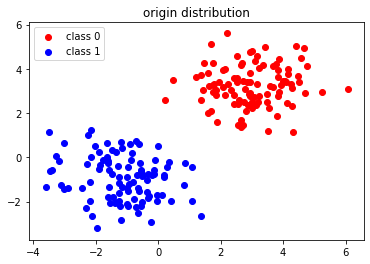

In [3]:
fig,axes = plt.subplots(1,1)
scatter_1 = axes.scatter(x0.data.numpy()[:,0],x0.data.numpy()[:,1],c='r')
scatter_2 = axes.scatter(x1.data.numpy()[:,0],x1.data.numpy()[:,1],c='b')
axes.set_title('origin distribution')
axes.legend([scatter_1,scatter_2],['class 0','class 1'])

In [4]:
w = torch.randn((2,1),requires_grad=True)
b = torch.zeros((1,),requires_grad=True)
train_x = torch.cat([x0,x1],0) #(200,2)
train_y = torch.cat([y0,y1],0) #(200)

In [5]:
loss_fn = torch.nn.BCELoss()

In [6]:
lr = 0.004

In [7]:
import numpy as np

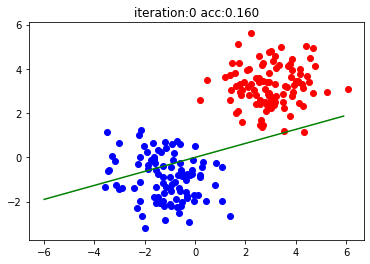

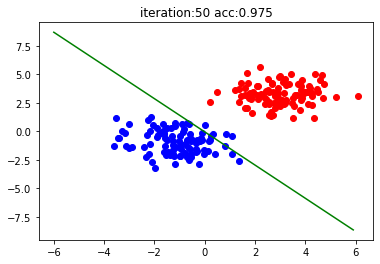

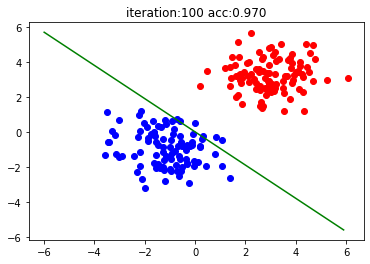

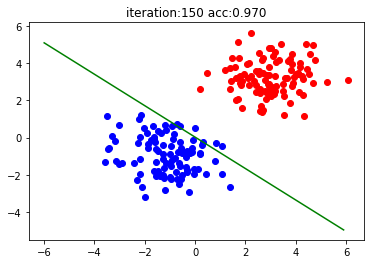

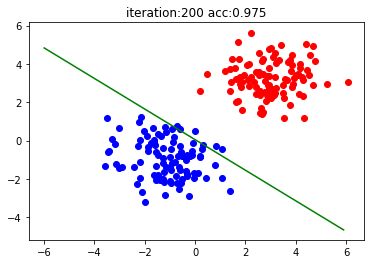

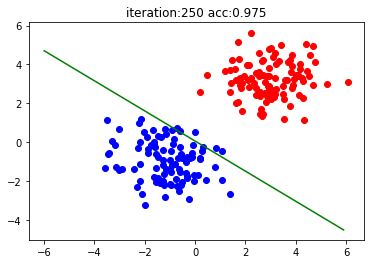

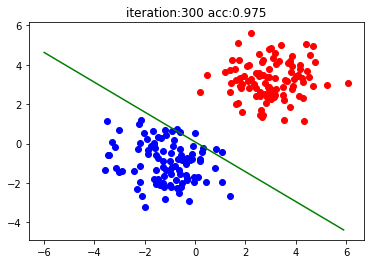

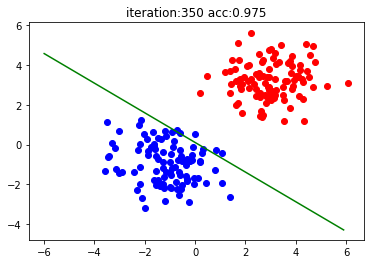

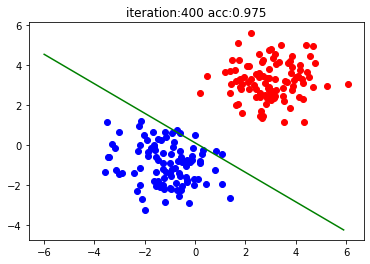

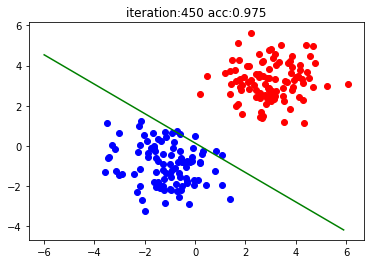

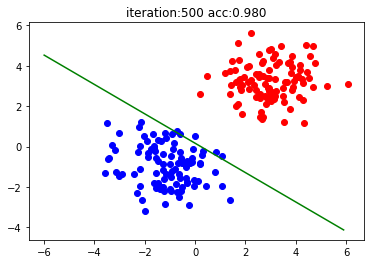

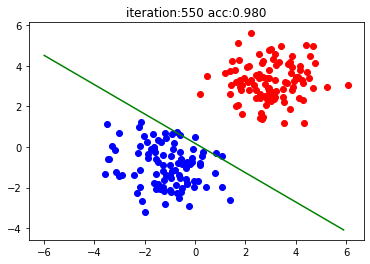

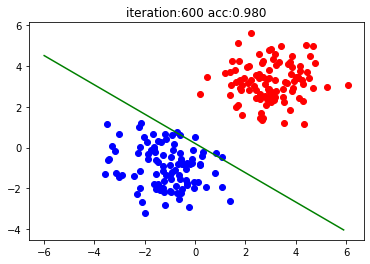

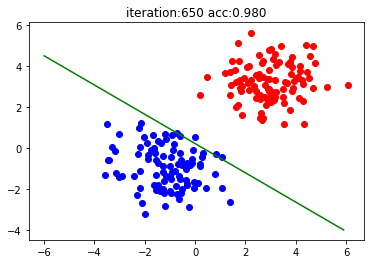

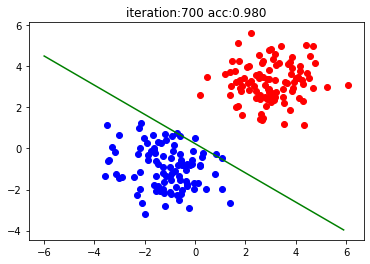

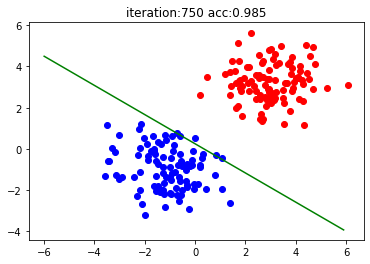

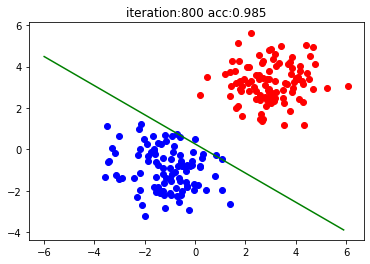

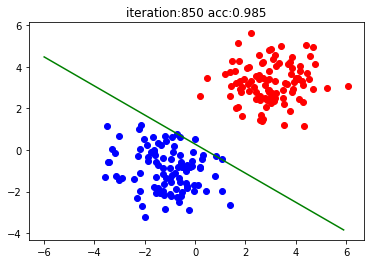

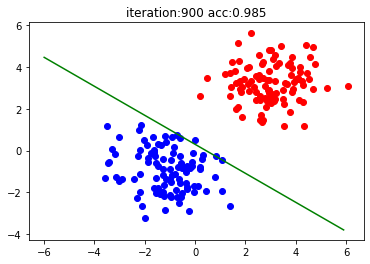

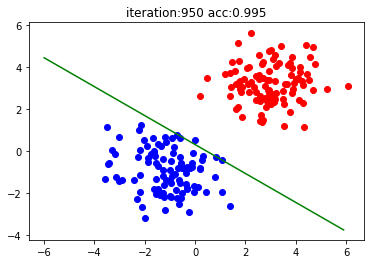

In [8]:
for iteration in range(1000):
    y = torch.add(torch.mm(train_x,w),b)
    y_sigmoid = torch.squeeze((torch.sigmoid(y)))
    loss = loss_fn(y_sigmoid,train_y)
    loss.backward()
    w.data.sub_(lr*w.grad)
    b.data.sub_(lr*b.grad)
    
    n_correct = (y_sigmoid.data.numpy()[:100]<0.5).nonzero()[0].size + (y_sigmoid.data.numpy()[100:]>0.5).nonzero()[0].size
    acc = n_correct/200
    if iteration % 50 ==0:
        plot_x = np.arange(-6,6,0.1)
        w_numpy = w.data.numpy()
        plot_y = ((-w_numpy[0]*plot_x - b.data.numpy())/w_numpy[1])
        fig,axes = plt.subplots(1,1)
        scatter_1 = axes.scatter(x0.data.numpy()[:,0],x0.data.numpy()[:,1],c='r')
        scatter_2 = axes.scatter(x1.data.numpy()[:,0],x1.data.numpy()[:,1],c='b')
        axes.plot(plot_x,plot_y,'g')
        axes.set_title('iteration:{} acc:{:.3f}'.format(iteration,acc))
    if acc > 0.995:
        plot_x = np.arange(-6,6,0.1)
        w_numpy = w.data.numpy()
        plot_y = ((-w_numpy[0]*plot_x - b.data.numpy())/w_numpy[1])
        fig,axes = plt.subplots(1,1)
        scatter_1 = axes.scatter(x0.data.numpy()[:,0],x0.data.numpy()[:,1],c='r')
        scatter_2 = axes.scatter(x1.data.numpy()[:,0],x1.data.numpy()[:,1],c='b')
        axes.plot(plot_x,plot_y,'g')
        axes.set_title('iteration:{} acc:{:.3f}'.format(iteration,acc))
        break

In [36]:
b = train_x[:,1]

In [37]:
b[0] = 500

In [39]:
b>0

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
        False, False, False, False,  True, False, False, False, False, False,
        False, False, False,  True, False, False, False, False, False, False,
        False, False, False, False, False, False,  True,  True, 

In [40]:
torch.masked_select(b,b>0)

tensor([5.0000e+02, 2.4000e+00, 2.4804e+00, 2.4310e+00, 2.7604e+00, 4.4659e+00,
        5.1324e+00, 1.8500e+00, 3.5993e+00, 4.9618e+00, 4.1120e+00, 3.7709e+00,
        3.0351e+00, 5.6412e+00, 3.2731e+00, 2.9726e+00, 4.3585e+00, 3.3845e+00,
        3.1785e+00, 3.4042e+00, 3.4756e+00, 3.4163e+00, 3.2566e+00, 4.8298e+00,
        3.6268e+00, 3.3252e+00, 4.9978e+00, 3.3231e+00, 1.3684e+00, 1.4651e+00,
        4.2472e+00, 2.8245e+00, 3.4219e+00, 4.1402e+00, 2.0075e+00, 3.1854e+00,
        3.9361e+00, 2.7530e+00, 2.6079e+00, 3.0570e+00, 3.3039e+00, 3.6903e+00,
        2.8925e+00, 2.7857e+00, 2.3027e+00, 3.9910e+00, 4.1801e+00, 4.2056e+00,
        4.7847e+00, 3.3867e+00, 4.0125e+00, 3.0755e+00, 2.4801e+00, 1.1655e+00,
        3.1012e+00, 3.0460e+00, 2.0848e+00, 2.5094e+00, 2.9217e+00, 2.4353e+00,
        2.3540e+00, 2.6004e+00, 2.2205e+00, 3.5704e+00, 4.2678e+00, 3.7917e+00,
        3.9566e+00, 2.6102e+00, 3.2101e+00, 3.7254e+00, 2.8859e+00, 2.3859e+00,
        3.3254e+00, 3.4375e+00, 4.4912e+

In [41]:
train_x

tensor([[ 4.0734e+00,  5.0000e+02],
        [ 2.5574e+00,  2.4000e+00],
        [ 3.1781e+00,  2.4804e+00],
        [ 2.4097e+00,  2.4310e+00],
        [ 2.9293e+00,  2.7604e+00],
        [ 3.8654e+00,  4.4659e+00],
        [ 1.6958e+00,  5.1324e+00],
        [ 3.7874e+00,  1.8500e+00],
        [ 2.5232e+00,  3.5993e+00],
        [ 4.6756e+00,  4.9618e+00],
        [ 3.6849e+00,  4.1120e+00],
        [ 4.1614e+00,  3.7709e+00],
        [ 2.3407e+00,  3.0351e+00],
        [ 2.2049e+00,  5.6412e+00],
        [ 1.7520e+00,  3.2731e+00],
        [ 5.2333e+00,  2.9726e+00],
        [ 3.1000e+00,  4.3585e+00],
        [ 2.8368e+00,  3.3845e+00],
        [ 3.6635e+00,  3.1785e+00],
        [ 4.5115e+00,  3.4042e+00],
        [ 4.8116e-01,  3.4756e+00],
        [ 2.5333e+00,  3.4163e+00],
        [ 3.9204e+00,  3.2566e+00],
        [ 3.0003e+00,  4.8298e+00],
        [ 3.8282e+00,  3.6268e+00],
        [ 1.7857e+00,  3.3252e+00],
        [ 3.4106e+00,  4.9978e+00],
        [ 3.1594e+00,  3.323